In [5]:
from math import ceil, floor
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import binom
from random import uniform

In [6]:
def prob(n, N, p):
    if n == 0:
        return 1
    
    elif n > 0:
        prob = 0
        _i = n
        while _i < N:
            p = 0
            for l in range(N-_i):
                 p += binom(N-n, l) * prob_RL(l, N-n-l) * binom(n, (_i - n)/2) * prob_RL(r=(_i+n)/2, l=(_i-n)/2)
            prob += p
            
            _i += 2
            
        return prob 
            
def prob_RL(r, l):
    return p**r * (1-p)**l

In [7]:
def prob_rand(n, N, p):
    num_reached = 0
    for _ in range(10000):
        place=0
        for _ in range(N):
            if place == n:
                num_reached += 1
                break
            chance = uniform(0,1)
            if chance < p:
                place += 1
            else:
                place += -1
    return num_reached/10000

Wall time: 20.5 s


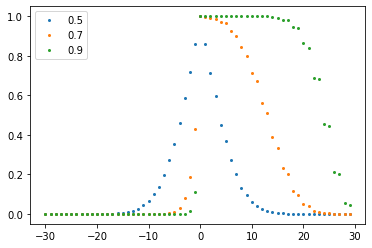

In [8]:
%%time

N = 30
p = 0.5

X = range(-N, N)
Y = [prob(n, N, 0.5) for n in X]
Y_rand1 = [prob_rand(n, N, 0.5) for n in X]
Y_rand2 = [prob_rand(n, N, 0.7) for n in X]
Y_rand3 = [prob_rand(n, N, 0.9) for n in X]
# plt.plot(X, Y, "x", markersize=2)
plt.plot(X, Y_rand1, "o", markersize=2, label="0.5")
plt.plot(X, Y_rand2, "o", markersize=2, label="0.7")
plt.plot(X, Y_rand3, "o", markersize=2, label="0.9")
plt.legend()